# **Tensorflow**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler #ölçeklendirme
import tensorflow as tf
from tensorflow.keras.models import Sequential # modeli bu sınıfıtan oluşturuyoruz 
from tensorflow.keras.layers import Dense, Activation, Dropout    # modelin katmanları için
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_excel("/content/gdrive/MyDrive/btk/bisiklet_fiyatlari.xlsx")
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fiyat             1000 non-null   float64
 1   BisikletOzellik1  1000 non-null   float64
 2   BisikletOzellik2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


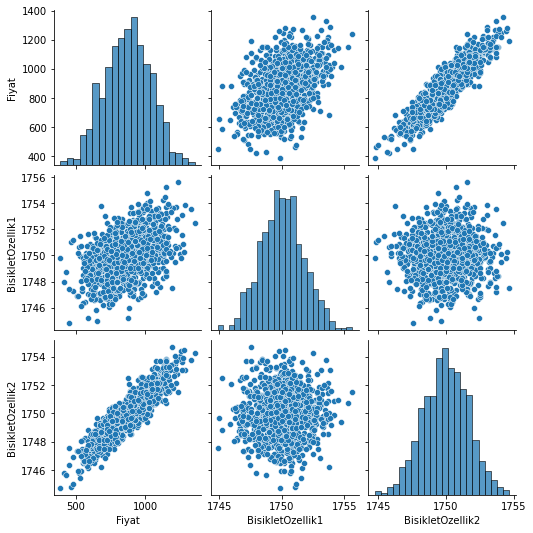

In [5]:
sns.pairplot(df);

In [6]:
# Veriyi train/test olarak ikiye ayıralım
from sklearn.model_selection import train_test_split 

In [7]:
# train_test_split
#y = ax + b
# y -> label
y = df["Fiyat"].values

# x -> feature (özellik)
X = df[["BisikletOzellik1", "BisikletOzellik2"]].values #sonuna values diyerek numpy array'e çeviyoruz

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=15)

In [8]:
print(X_test.shape)
print(X_train.shape)

(330, 2)
(670, 2)


In [9]:
X_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [10]:
print(y_test.shape)
print(y_train.shape)

(330,)
(670,)


### **Scaling** 

In [11]:
# veriyi 0-1 arasında ölçeklendiriyoruz. 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [13]:
X_train  # 0-1 arasına fit ettik.

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [14]:
model = Sequential()

model.add(Dense(4, activation = "relu"))  #oluşturmak istediğimiz gizli katman 3 nörona sahip 3 gizli katman
model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))

model.add(Dense(1)) #çıktı için 1 tane nöron vermemiz yeterli olacaktır.

model.compile(optimizer = "rmsprop", loss = "mse")

In [15]:
# çok büyük bir veriyi aynı anda veriye vermek sorun yaratır. Ondan bach_size kullanılır. 
# Burada veri seti az olduğu için burada kullanılmamıştır. Sadece epoch kullanacağız.

model.fit(X_train, y_train, epochs = 250)

Epoch 1/250
21/21 [==============================] - 1s 4ms/step - loss: 795863.6875
Epoch 2/250
21/21 [==============================] - 0s 12ms/step - loss: 795762.2500
Epoch 3/250
21/21 [==============================] - 0s 3ms/step - loss: 795660.1875
Epoch 4/250
21/21 [==============================] - 0s 3ms/step - loss: 795530.9375
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 795370.6250
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 795172.3750
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 794921.5625
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 794624.1875
Epoch 9/250
21/21 [==============================] - 0s 4ms/step - loss: 794287.7500
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 793911.1875
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 793489.9375
Epoch 12/250
21/21 [==============================] - 0s 2ms/s

In [16]:
loss = model.history.history["loss"]

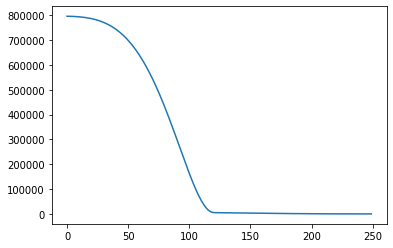

In [17]:
sns.lineplot(x=range(len(loss)), y = loss);

In [18]:
trainloss = model.evaluate(X_train, y_train, verbose=0)  
trainloss

78.05349731445312

In [19]:
testloss = model.evaluate(X_test, y_test, verbose=0)  
testloss

81.4006118774414

In [20]:
test_tahminleri = model.predict(X_test)
test_tahminleri

11/11 [==============================] - 0s 2ms/step


array([[1074.9971 ],
       [ 625.44244],
       [ 875.04626],
       [ 894.82086],
       [ 900.3327 ],
       [ 457.85648],
       [ 930.18134],
       [ 990.1707 ],
       [ 938.464  ],
       [1014.77496],
       [ 751.1175 ],
       [ 915.54095],
       [ 947.28766],
       [1051.8635 ],
       [1116.8436 ],
       [ 683.38055],
       [1125.0747 ],
       [ 654.4484 ],
       [1152.659  ],
       [ 885.45245],
       [ 892.04034],
       [ 716.5335 ],
       [ 459.02414],
       [ 615.83636],
       [ 834.0079 ],
       [1087.612  ],
       [ 715.2713 ],
       [ 758.0097 ],
       [ 873.76483],
       [ 771.49945],
       [ 455.87988],
       [ 782.6379 ],
       [ 729.3826 ],
       [ 649.3604 ],
       [ 886.3538 ],
       [ 843.7606 ],
       [1033.0917 ],
       [1021.75104],
       [ 844.1369 ],
       [ 862.2907 ],
       [ 757.52045],
       [1171.7462 ],
       [1094.6514 ],
       [1084.715  ],
       [ 870.9473 ],
       [ 598.7774 ],
       [1144.1443 ],
       [ 972.

In [21]:
tahmin_df = pd.DataFrame(y_test, columns = ["Gerçek Y"])
tahmin_df

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [22]:
test_tahminleri = pd.Series(test_tahminleri.reshape(330,))

In [23]:
test_tahminleri

0      1074.997070
1       625.442444
2       875.046265
3       894.820862
4       900.332703
          ...     
325    1011.075256
326     792.086731
327     765.809387
328    1163.381592
329     804.468201
Length: 330, dtype: float32

In [24]:
tahmin_df = pd.concat([tahmin_df, test_tahminleri], axis = 1)
tahmin_df

,Gerçek Y,0
0,1081.652164,1074.997070
1,622.675990,625.442444
2,889.356810,875.046265
3,902.826733,894.820862
4,897.662404,900.332703
...,...,...
325,1028.438035,1011.075256
326,789.934950,792.086731
327,758.490486,765.809387
328,1172.871659,1163.381592


In [25]:
tahmin_df.columns = ["gerçek_y", "tahmin_y"]
tahmin_df

,gerçek_y,tahmin_y
0,1081.652164,1074.997070
1,622.675990,625.442444
2,889.356810,875.046265
3,902.826733,894.820862
4,897.662404,900.332703
...,...,...
325,1028.438035,1011.075256
326,789.934950,792.086731
327,758.490486,765.809387
328,1172.871659,1163.381592


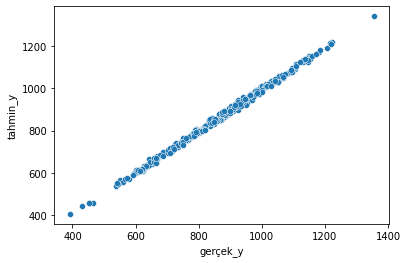

In [26]:
sns.scatterplot(x="gerçek_y", y = "tahmin_y", data = tahmin_df);

In [27]:

mean_absolute_error(tahmin_df["gerçek_y"], tahmin_df["tahmin_y"]) 
#6.90 lık bir hata mevcut

7.24920078464252

In [28]:
mean_squared_error(tahmin_df["gerçek_y"], tahmin_df["tahmin_y"])

81.4006223952691

In [29]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [30]:
yeni_bisiklet_özellikleri = [[1751, 1750]]
yeni_bisiklet_özellikleri = scaler.transform(yeni_bisiklet_özellikleri)
model.predict(yeni_bisiklet_özellikleri)

1/1 [==============================] - 0s 43ms/step


array([[912.90717]], dtype=float32)

In [31]:
from tensorflow.keras.models import load_model
model.save("bisiklet_modeli.h5")

In [32]:
son_model = load_model("bisiklet_modeli.h5")
son_model.predict(yeni_bisiklet_özellikleri)

1/1 [==============================] - 0s 60ms/step


array([[912.90717]], dtype=float32)

## **Araba Tahmin Modeli**

In [33]:
df = pd.read_excel("/content/gdrive/MyDrive/btk/merc.xlsx")
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [35]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


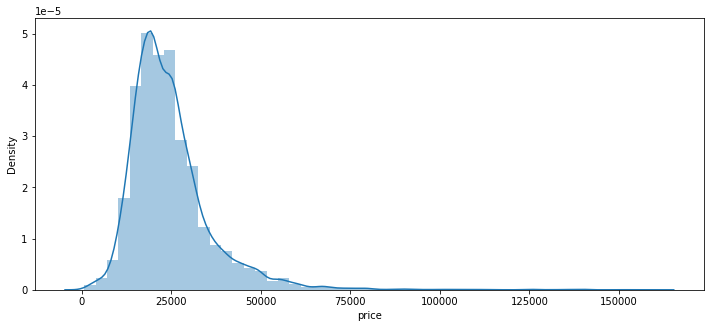

In [37]:
plt.figure(figsize = (12,5))
sns.distplot(df["price"]);

Çok yüksek fiyata satılan arabalar yüzünden grafik sağa doğru uzamıştır. Dolayısyla bunlar baskılanabilir, baskılanmadan da model tahmini yapıp kıyaslama yapılabilir. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


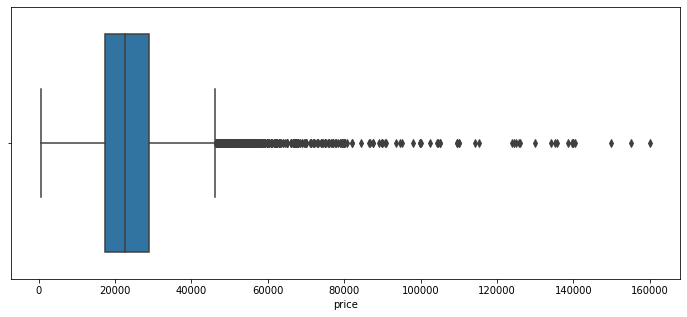

In [38]:
plt.figure(figsize = (12,5))
sns.boxplot(df["price"]);

Yukarıda bahsedildiği gibi outlier değerlerin olduğuda gözlemlenmektedir.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


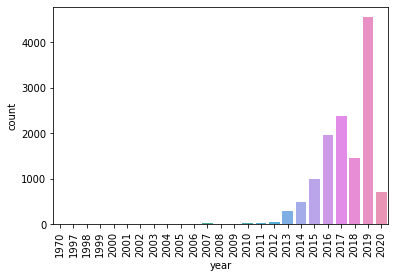

In [39]:
sns.countplot(df["year"])
plt.xticks(rotation = 90);

Verilerin güncel olduğunu söyleyebiliriz.

In [40]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [41]:
df.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

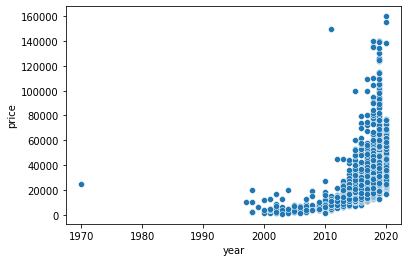

In [42]:
sns.scatterplot(x = "year", y = "price", data = df)

In [43]:
df.sort_values("price", ascending = False).head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [44]:
df.sort_values("price", ascending = False).head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [45]:
len(df) * 0.01

#en yüksek fiyatlı 131 arabayı gözlem dışı bırakacağız. Verinin %99 u ile işlem yapacağız.

131.19

In [46]:
df1 = df.sort_values("price", ascending = False).iloc[131:]
df1.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12988 entries, 6177 to 11816
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          12988 non-null  int64  
 1   price         12988 non-null  int64  
 2   transmission  12988 non-null  object 
 3   mileage       12988 non-null  int64  
 4   tax           12988 non-null  int64  
 5   mpg           12988 non-null  float64
 6   engineSize    12988 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 811.8+ KB


In [48]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12988.0,2017.281876,2.228515,1970.0,2016.000,2018.0,2019.00,2020.0
price,12988.0,24074.926933,9866.224575,650.0,17357.500,22299.0,28706.00,65990.0
mileage,12988.0,22132.741146,21196.776401,1.0,6322.000,15369.5,31982.25,259000.0
tax,12988.0,129.689714,65.183076,0.0,125.000,145.0,145.00,580.0
mpg,12988.0,55.437142,15.025999,1.1,45.600,56.5,64.20,217.3
engineSize,12988.0,2.050901,0.532596,0.0,1.675,2.0,2.10,6.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


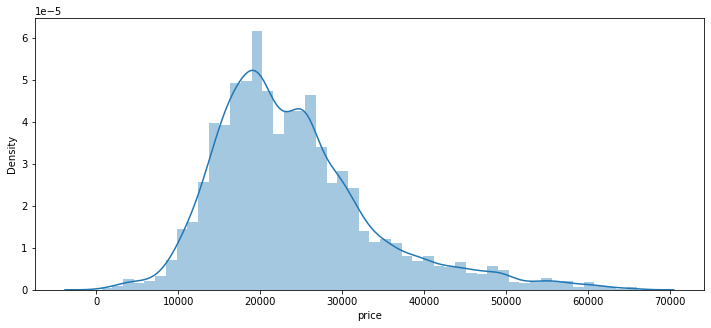

In [49]:
plt.figure(figsize = (12,5))
sns.distplot(df1["price"]);
#daha normal bir dağılım elde ettik.

In [50]:
df1.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

1970'de 24999.000000 pound'a satılması bu değerin ya özel bir durumdan öyle ya da yanlış girilmiş olabilir yorumunu yaptırıyor. O yüzden bu veriden kurtulmak mantıklı olabilir. 

In [51]:
df1[df1.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [52]:
df = df1

In [53]:
df = df[df.year != 1970]
df

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [54]:
df.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

Transmission veriside nümerik olmadığı için model hata verecektir. Bir işimede yaramadığı için bu kolonu uçurabiliriz. 

In [55]:
df = df.drop("transmission", axis = 1)
df

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [56]:
y = df["price"].values
X = df.drop("price", axis = 1).values

In [57]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [58]:
X

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [59]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [60]:
print(len(X_train))
print(len(X_test))

9090
3897


In [61]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
model = Sequential()

model.add(Dense(12, activation = "relu"))  
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1)) 

model.compile(optimizer = "adam", loss = "mse")

In [63]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test),
          batch_size = 250, epochs = 300)

Epoch 1/300
37/37 [==============================] - 2s 14ms/step - loss: 672146240.0000 - val_loss: 688104896.0000
Epoch 2/300
37/37 [==============================] - 0s 6ms/step - loss: 672127488.0000 - val_loss: 688072128.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 672057856.0000 - val_loss: 687937728.0000
Epoch 4/300
37/37 [==============================] - 0s 6ms/step - loss: 671798912.0000 - val_loss: 687473152.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 670986752.0000 - val_loss: 686113792.0000
Epoch 6/300
37/37 [==============================] - 0s 5ms/step - loss: 668813568.0000 - val_loss: 682721216.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 663707136.0000 - val_loss: 675149504.0000
Epoch 8/300
37/37 [==============================] - 0s 5ms/step - loss: 653095616.0000 - val_loss: 660284224.0000
Epoch 9/300
37/37 [==============================] - 0s 5ms/step - loss: 633479

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head() 

,loss,val_loss
0,672146240.0,688104896.0
1,672127488.0,688072128.0
2,672057856.0,687937728.0
3,671798912.0,687473152.0
4,670986752.0,686113792.0


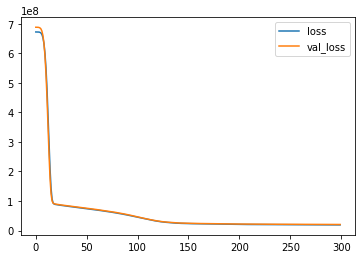

In [65]:
loss_df.plot()

In [66]:
prediction = model.predict(X_test)
prediction

122/122 [==============================] - 0s 2ms/step


array([[21955.79 ],
       [23604.918],
       [24983.645],
       ...,
       [26286.799],
       [12342.64 ],
       [24823.172]], dtype=float32)

In [67]:
mean_absolute_error(y_test, prediction)

3199.117975175084

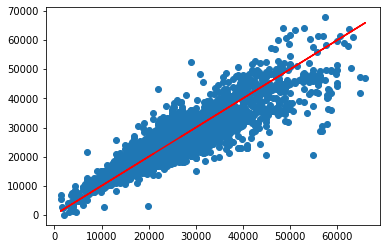

In [68]:
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, "r-")

Yeni model için veri setindeki var olan modeli kullanacağız bakalım tahin ne kadar başarılı olacak.

In [69]:
df.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [70]:
new_car = df.drop("price", axis = 1).iloc[2]
type(new_car)

pandas.core.series.Series

In [71]:
new_car = scaler.transform(new_car.values.reshape(-1,5))

In [72]:
model.predict(new_car)

1/1 [==============================] - 0s 20ms/step


array([[62201.72]], dtype=float32)

65980.0 olan fiyatı 62630.5 olarak tahmin etti oldukça yaklaşık bir değer elde ettik.

## **Tesnorflow Sınıflandırma** 

In [73]:
df = pd.read_excel("/content/gdrive/MyDrive/btk/maliciousornot.xlsx")
df.head()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,548.0,0.383212,0.486613,0.000000,0.000000,0.000000,1.000000,1.000000
URL_LENGTH,548.0,949.973475,3202.802599,10.051787,15.838688,18.069900,23.264187,12828.981333
NUMBER_SPECIAL_CHARACTERS,548.0,25.015747,5.605685,12.577687,20.987638,24.423510,28.270650,50.880693
TCP_CONVERSATION_EXCHANGE,548.0,119.725438,31.842845,56.722647,97.470595,112.920683,137.175800,244.170333
DIST_REMOTE_TCP_PORT,548.0,857.123249,461.579998,185.880333,544.622900,723.637967,1037.270550,3239.628667
REMOTE_IPS,548.0,5.785481,27.796268,0.068173,0.112309,0.125084,0.137694,159.326000
APP_BYTES,548.0,6.499737,35.390031,0.025104,0.084718,0.122720,0.172215,358.807333
SOURCE_APP_PACKETS,548.0,10.069604,46.976527,0.000000,0.038394,0.085395,0.189799,405.439333
REMOTE_APP_PACKETS,548.0,3.181365,21.315640,0.000000,0.026383,0.045304,0.101201,209.844000
SOURCE_APP_BYTES,548.0,22.809689,70.942060,0.151165,0.211755,0.235168,0.266159,393.781333


In [76]:
df.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

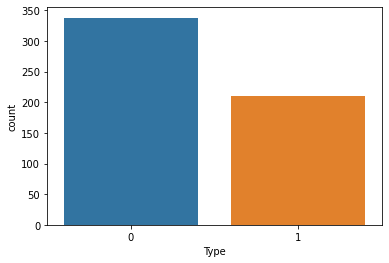

In [77]:
sns.countplot(x = "Type", data = df)

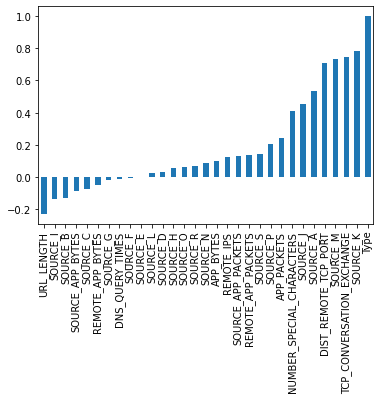

In [78]:
df.corr()["Type"].sort_values().plot(kind = "bar")

In [79]:
y = df["Type"].values
X = df.drop("Type", axis = 1).values
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
X_train.shape

(383, 30)

shape attıktan sonra kaç kolon geldiyse o kadar nöron sayısı girmek gerekir diye genel geçer bir kural vardır. Sonuca göre bunu değiştirebilirsin. 

In [81]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))  
model.add(Dense(units = 15, activation = "relu")) 
model.add(Dense(units = 15, activation = "relu")) 

model.add(Dense(units = 1, activation = "sigmoid")) 

model.compile(optimizer = "adam", loss = "binary_crossentropy") #sınıflandırma olduuğu için

In [82]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test),
          epochs = 300, verbose = 1)

Epoch 1/300
12/12 [==============================] - 1s 17ms/step - loss: 0.6818 - val_loss: 0.6758
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 0.6593 - val_loss: 0.6641
Epoch 3/300
12/12 [==============================] - 0s 7ms/step - loss: 0.6345 - val_loss: 0.6423
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 0.6066 - val_loss: 0.6147
Epoch 5/300
12/12 [==============================] - 0s 7ms/step - loss: 0.5721 - val_loss: 0.5853
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 0.5309 - val_loss: 0.5503
Epoch 7/300
12/12 [==============================] - 0s 5ms/step - loss: 0.4853 - val_loss: 0.5121
Epoch 8/300
12/12 [==============================] - 0s 6ms/step - loss: 0.4357 - val_loss: 0.4631
Epoch 9/300
12/12 [==============================] - 0s 5ms/step - loss: 0.3853 - val_loss: 0.4193
Epoch 10/300
12/12 [==============================] - 0s 6ms/step - loss: 0.3389 - val_loss: 0.3906
Epoch 11

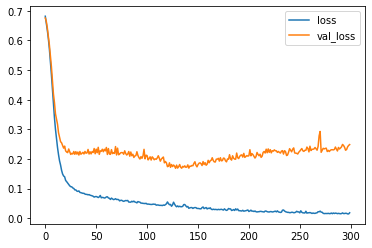

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Model overfit olmuş dolayısıyla earlystopping kullanarak, overfit olmadan dur diyeceğiz. 

In [88]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))  
model.add(Dense(units = 15, activation = "relu")) 
model.add(Dense(units = 15, activation = "relu")) 

model.add(Dense(units = 1, activation = "sigmoid")) 

model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [89]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose =1, patience = 25)
model.fit(x= X_train, y=y_train, epochs = 700, validation_data = (X_test, y_test),
          verbose =1, callbacks = [early_stopping])

Epoch 1/700
12/12 [==============================] - 1s 20ms/step - loss: 0.6810 - val_loss: 0.6845
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6629 - val_loss: 0.6728
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6432 - val_loss: 0.6620
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6196 - val_loss: 0.6444
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5930 - val_loss: 0.6241
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5621 - val_loss: 0.6042
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5272 - val_loss: 0.5714
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4902 - val_loss: 0.5375
Epoch 9/700
12/12 [==============================] - 0s 7ms/step - loss: 0.4495 - val_loss: 0.5137
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4090 - val_loss: 0.4664
Epoch 11

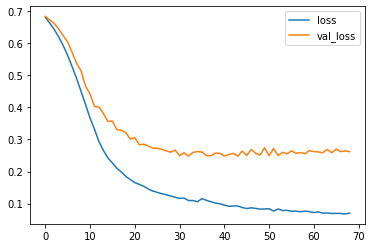

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [91]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6)) 

model.add(Dense(units = 1, activation = "sigmoid")) 

model.compile(optimizer = "adam", loss = "binary_crossentropy")

early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose =1, patience = 25)
model.fit(x= X_train, y=y_train, epochs = 700, validation_data = (X_test, y_test),
          verbose =1, callbacks = [early_stopping])

Epoch 1/700
12/12 [==============================] - 2s 26ms/step - loss: 0.7080 - val_loss: 0.6897
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.7185 - val_loss: 0.6888
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6770 - val_loss: 0.6879
Epoch 4/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6854 - val_loss: 0.6872
Epoch 5/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6770 - val_loss: 0.6863
Epoch 6/700
12/12 [==============================] - 0s 12ms/step - loss: 0.6872 - val_loss: 0.6848
Epoch 7/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6696 - val_loss: 0.6823
Epoch 8/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6605 - val_loss: 0.6809
Epoch 9/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6667 - val_loss: 0.6786
Epoch 10/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6520 - val_loss: 0.6759
Epoch

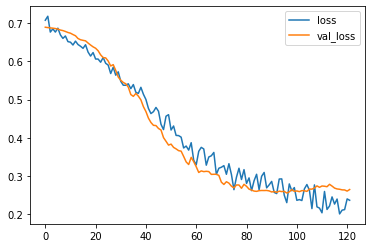

In [92]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [104]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

6/6 [==============================] - 0s 7ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        91
           1       0.92      0.88      0.90        74

    accuracy                           0.91       165
   macro avg       0.91      0.91      0.91       165
weighted avg       0.91      0.91      0.91       165



In [108]:
print(confusion_matrix(y_test, predictions))

[[85  6]
 [ 9 65]]
